# Imports 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.pipeline import Pipeline
%matplotlib inline
np.set_printoptions(suppress=True, formatter={'float_kind':'{:f}'.format})
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('use_inf_as_na', True)
# Code Planned, Written, Developed, Documented by Andrianos Michail
# For Machine Learning for Econ Assignment 1

# Reading the Data

In [2]:
orig_df = pd.read_csv('peru_matlab_export_full.csv')
df = orig_df.copy()
del(df['id_for_matlab']) # redundant row for calculations
del(df['h_hhsize']) # redundant row for calculations
df.keys()

Index(['lnpercapitaconsumption', 'd_fuel_other', 'd_fuel_wood', 'd_fuel_coal',
       'd_fuel_kerosene', 'd_fuel_gas', 'd_fuel_electric', 'd_fuel_none',
       'd_water_other', 'd_water_river', 'd_water_well', 'd_water_truck',
       'd_water_pylon', 'd_water_outside', 'd_water_inside', 'd_drain_none',
       'd_drain_river', 'd_drain_cesspool', 'd_drain_septic',
       'd_drain_outside', 'd_drain_inside', 'd_wall_other', 'd_wall_woodmat',
       'd_wall_stonemud', 'd_wall_quincha', 'd_wall_tapia', 'd_wall_adobe',
       'd_wall_stonecement', 'd_wall_brickcement', 'd_roof_other',
       'd_roof_straw', 'd_roof_mat', 'd_roof_platecane', 'd_roof_tile',
       'd_roof_wood', 'd_roof_concrete', 'd_floor_other', 'd_floor_earth',
       'd_floor_cement', 'd_floor_wood', 'd_floor_tile', 'd_floor_sheets',
       'd_floor_parquet', 'd_electricity', 'd_telephone', 'd_h_educ_none',
       'd_h_educ_pre', 'd_h_educ_prim', 'd_h_educ_sec',
       'd_h_educ_higher_nouni', 'd_h_educ_higher_uni', 'd_h_

In [3]:
df['lnpercapitaconsumption'] = df['lnpercapitaconsumption'].fillna(0) # Filling with 0s for simplicity
df['percapitaconsumption'] = df['percapitaconsumption'].fillna(0) # Filling with 0s for simplicity
df

,lnpercapitaconsumption,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,...,d_lux_2,d_lux_3,d_lux_4,d_lux_5,training,percapitaconsumption,poor,hhid,lncaphat_OLS,percapitahat_OLS
0,5.352,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,211.000,0,233710511,5.246,284.424
1,5.769,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,320.139,0,295508011,6.129,522.884
2,5.968,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,390.832,0,257600211,6.666,878.496
3,5.655,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,285.602,1,198104311,6.088,567.471
4,4.771,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,118.071,1,24805311,5.008,115.493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46300,6.146,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,466.992,0,199903811,6.100,520.862
46301,5.531,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,252.354,0,52806611,5.485,266.182
46302,5.965,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,389.667,0,5900111,5.967,395.692
46303,4.737,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,114.055,1,360704611,5.558,331.665


In [4]:
training_data = df[df['training'] == 1] # selecting the training data
training_data = training_data.drop('poor', axis=1) # removing the poor from feature set

In [5]:
training_data

,lnpercapitaconsumption,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,...,d_lux_1,d_lux_2,d_lux_3,d_lux_4,d_lux_5,training,percapitaconsumption,hhid,lncaphat_OLS,percapitahat_OLS
23152,5.305,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,201.295,278906011,5.756,443.774
23153,7.179,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,1311.855,42105011,6.600,814.992
23154,5.546,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,256.213,133206411,5.271,202.635
23155,5.321,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,204.669,162703311,5.131,127.658
23156,5.348,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,210.185,85709411,5.013,143.478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46300,6.146,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,466.992,199903811,6.100,520.862
46301,5.531,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,252.354,52806611,5.485,266.182
46302,5.965,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,389.667,5900111,5.967,395.692
46303,4.737,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,114.055,360704611,5.558,331.665


In [6]:
training_data

,lnpercapitaconsumption,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,...,d_lux_1,d_lux_2,d_lux_3,d_lux_4,d_lux_5,training,percapitaconsumption,hhid,lncaphat_OLS,percapitahat_OLS
23152,5.305,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,201.295,278906011,5.756,443.774
23153,7.179,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,1311.855,42105011,6.600,814.992
23154,5.546,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,256.213,133206411,5.271,202.635
23155,5.321,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,204.669,162703311,5.131,127.658
23156,5.348,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,210.185,85709411,5.013,143.478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46300,6.146,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,466.992,199903811,6.100,520.862
46301,5.531,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,252.354,52806611,5.485,266.182
46302,5.965,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,389.667,5900111,5.967,395.692
46303,4.737,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,114.055,360704611,5.558,331.665


In [7]:
total_training_data = len(training_data)

# Extract non binary keys and feature keys

In [8]:
non_binary_keys = [key for key in training_data.keys() if np.sum(training_data[key]) > len(training_data)] #get the non binary keys of the original dataframe

In [9]:
non_binary_keys

['lnpercapitaconsumption',
 'percapitaconsumption',
 'hhid',
 'lncaphat_OLS',
 'percapitahat_OLS']

In [10]:
feature_keys = [key for key in list(training_data.keys()) if key not in non_binary_keys and key != 'training' and key != 'poor']
print(len(feature_keys))
feature_keys

72


['d_fuel_other',
 'd_fuel_wood',
 'd_fuel_coal',
 'd_fuel_kerosene',
 'd_fuel_gas',
 'd_fuel_electric',
 'd_fuel_none',
 'd_water_other',
 'd_water_river',
 'd_water_well',
 'd_water_truck',
 'd_water_pylon',
 'd_water_outside',
 'd_water_inside',
 'd_drain_none',
 'd_drain_river',
 'd_drain_cesspool',
 'd_drain_septic',
 'd_drain_outside',
 'd_drain_inside',
 'd_wall_other',
 'd_wall_woodmat',
 'd_wall_stonemud',
 'd_wall_quincha',
 'd_wall_tapia',
 'd_wall_adobe',
 'd_wall_stonecement',
 'd_wall_brickcement',
 'd_roof_other',
 'd_roof_straw',
 'd_roof_mat',
 'd_roof_platecane',
 'd_roof_tile',
 'd_roof_wood',
 'd_roof_concrete',
 'd_floor_other',
 'd_floor_earth',
 'd_floor_cement',
 'd_floor_wood',
 'd_floor_tile',
 'd_floor_sheets',
 'd_floor_parquet',
 'd_electricity',
 'd_telephone',
 'd_h_educ_none',
 'd_h_educ_pre',
 'd_h_educ_prim',
 'd_h_educ_sec',
 'd_h_educ_higher_nouni',
 'd_h_educ_higher_uni',
 'd_h_educ_post',
 'd_max_educ_none',
 'd_max_educ_prim',
 'd_max_educ_sec',
 '

In [11]:
non_binary_df = df[non_binary_keys]

In [12]:
non_binary_df #all of these are non features, all our features are binary.

,lnpercapitaconsumption,percapitaconsumption,hhid,lncaphat_OLS,percapitahat_OLS
0,5.352,211.000,233710511,5.246,284.424
1,5.769,320.139,295508011,6.129,522.884
2,5.968,390.832,257600211,6.666,878.496
3,5.655,285.602,198104311,6.088,567.471
4,4.771,118.071,24805311,5.008,115.493
...,...,...,...,...,...
46300,6.146,466.992,199903811,6.100,520.862
46301,5.531,252.354,52806611,5.485,266.182
46302,5.965,389.667,5900111,5.967,395.692
46303,4.737,114.055,360704611,5.558,331.665


# Generation of correlations heatmap

In [13]:
def hamming_distance(a, b): # define the hamming distance for the binary vectors
    return np.sum(np.abs(a - b)) / total_training_data

In [14]:
training_data_features = training_data.drop(non_binary_keys, axis=1) #drop the non binary keys (but there are still part of the df)
training_features_correlation = training_data_features.corr(method = hamming_distance) #do a correlation matrix using hamming distance (to use for percentages)
training_data_percentages = training_features_correlation['training'] #this is the percentage of occurence in whole
training_features_correlation = training_data_features.corr() #do a correlation matrix using pearson for actual use as correlation
training_features_correlation = training_features_correlation.drop('training', axis=1) #drop redundant
training_features_correlation = training_features_correlation.drop('training', axis=0) #drop training, redundant

In [15]:
def regression_accuracy_metrics(labels, predicted_labels):
    return mean_absolute_error(labels, predicted_labels), mean_squared_error(labels, predicted_labels)

In [16]:
training_data_percentages = training_data_percentages.drop('training', axis=0) #drop the training in the result itself
training_data = training_data.drop('training', axis=1)
training_data_percentages = training_data_percentages*100 #make it into a readable number for percentages

In [17]:
training_data_percentages = training_data_percentages.sort_values(ascending = False)

In [18]:
training_data_percentages_keys = np.array(list(training_data_percentages.keys()))

In [19]:
training_data_percentages_values = np.array([perc for perc in training_data_percentages])
training_data_percentages_values

array([99.965447, 99.555133, 99.239839, 98.674038, 98.293958, 97.995940,
       97.935473, 97.352395, 97.326480, 96.920485, 96.769317, 96.717488,
       96.713169, 96.695893, 96.613830, 96.549043, 96.410832, 96.056667,
       95.991880, 95.883903, 95.767287, 95.642033, 95.620438, 94.959616,
       93.996458, 93.560230, 93.361551, 93.162873, 93.132639, 92.299054,
       92.031270, 91.253833, 90.778733, 90.282037, 89.582344, 89.500281,
       88.588952, 88.074979, 86.926100, 86.377575, 86.010452, 85.060251,
       84.589470, 84.516045, 83.617674, 83.552887, 82.917980, 82.663154,
       82.373774, 80.443139, 80.179674, 79.717531, 79.121496, 78.128104,
       71.411912, 69.282598, 68.505161, 68.505161, 66.889820, 65.866194,
       61.577333, 59.849696, 59.456658, 59.413467, 58.152291, 55.690407,
       53.008249, 48.948300, 48.149268, 45.752170, 39.152594, 16.304583])

# Display Figure Household features ownership

In [20]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20,18), dpi=512, facecolor='w', edgecolor='r')
plt.title("Percentage of Households Owning")
sns.barplot(training_data_percentages_values, training_data_percentages_keys)
plt.savefig('household_percentage.png', dpi=512)
plt.show()

In [21]:
#code to print this as a graph here. Maybe this one? needs rerunning to test
# plt.pyplot.bar(training_data_percentages, height = 100, width = 100)

In [22]:
training_features_correlation

,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,d_water_well,...,d_crowd_1to2,d_crowd_2to4,d_crowd_4to6,d_crowd_6plus,d_lux_0,d_lux_1,d_lux_2,d_lux_3,d_lux_4,d_lux_5
d_fuel_other,1.000,-0.228,-0.056,-0.023,-0.355,-0.030,-0.061,0.030,0.213,0.104,...,-0.022,0.044,0.030,0.007,0.250,-0.107,-0.103,-0.088,-0.072,-0.066
d_fuel_wood,-0.228,1.000,-0.110,-0.045,-0.691,-0.058,-0.119,-0.011,0.373,0.060,...,-0.040,0.105,0.062,0.097,0.435,-0.159,-0.190,-0.163,-0.139,-0.126
d_fuel_coal,-0.056,-0.110,1.000,-0.011,-0.171,-0.014,-0.029,0.055,-0.058,-0.006,...,0.005,0.034,0.006,0.003,0.002,0.041,0.000,-0.021,-0.030,-0.030
d_fuel_kerosene,-0.023,-0.045,-0.011,1.000,-0.069,-0.006,-0.012,0.006,-0.033,-0.014,...,-0.016,0.013,-0.005,-0.004,0.014,0.003,-0.008,-0.008,-0.008,-0.013
d_fuel_gas,-0.355,-0.691,-0.171,-0.069,1.000,-0.091,-0.185,-0.050,-0.431,-0.109,...,0.056,-0.112,-0.064,-0.085,-0.564,0.203,0.244,0.216,0.187,0.163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_lux_1,-0.107,-0.159,0.041,0.003,0.203,-0.013,-0.004,-0.020,-0.140,-0.023,...,0.029,-0.010,-0.026,-0.039,-0.537,1.000,-0.177,-0.134,-0.105,-0.095
d_lux_2,-0.103,-0.190,0.000,-0.008,0.244,0.030,-0.027,-0.030,-0.137,-0.038,...,0.024,-0.064,-0.045,-0.036,-0.391,-0.177,1.000,-0.097,-0.077,-0.069
d_lux_3,-0.088,-0.163,-0.021,-0.008,0.216,0.028,-0.026,-0.035,-0.122,-0.026,...,0.045,-0.085,-0.048,-0.034,-0.295,-0.134,-0.097,1.000,-0.058,-0.052
d_lux_4,-0.072,-0.139,-0.030,-0.008,0.187,0.030,-0.027,-0.034,-0.101,-0.035,...,0.016,-0.069,-0.040,-0.027,-0.232,-0.105,-0.077,-0.058,1.000,-0.041


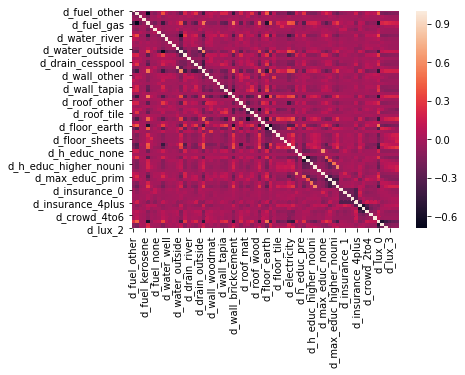

In [23]:
# printing full heatmap
heatmap = sns.heatmap(training_features_correlation)
heatmap.figure.savefig("heatmap.png", dpi=512, cmap="Greens")

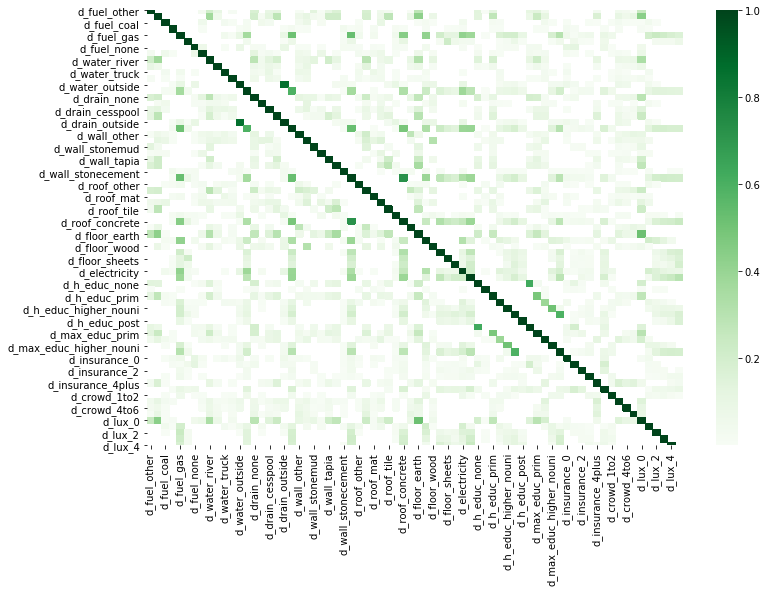

In [24]:
#print partial heatmap
kot = training_features_correlation[training_features_correlation>=0]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [26]:
training_data = training_data.apply(pd.to_numeric, errors='coerce')
training_data = training_data.fillna(0)

In [27]:
print(np.any(np.isnan(training_data)))
np.all(np.isfinite(training_data))

False


True

In [28]:
training_data.keys()

Index(['lnpercapitaconsumption', 'd_fuel_other', 'd_fuel_wood', 'd_fuel_coal',
       'd_fuel_kerosene', 'd_fuel_gas', 'd_fuel_electric', 'd_fuel_none',
       'd_water_other', 'd_water_river', 'd_water_well', 'd_water_truck',
       'd_water_pylon', 'd_water_outside', 'd_water_inside', 'd_drain_none',
       'd_drain_river', 'd_drain_cesspool', 'd_drain_septic',
       'd_drain_outside', 'd_drain_inside', 'd_wall_other', 'd_wall_woodmat',
       'd_wall_stonemud', 'd_wall_quincha', 'd_wall_tapia', 'd_wall_adobe',
       'd_wall_stonecement', 'd_wall_brickcement', 'd_roof_other',
       'd_roof_straw', 'd_roof_mat', 'd_roof_platecane', 'd_roof_tile',
       'd_roof_wood', 'd_roof_concrete', 'd_floor_other', 'd_floor_earth',
       'd_floor_cement', 'd_floor_wood', 'd_floor_tile', 'd_floor_sheets',
       'd_floor_parquet', 'd_electricity', 'd_telephone', 'd_h_educ_none',
       'd_h_educ_pre', 'd_h_educ_prim', 'd_h_educ_sec',
       'd_h_educ_higher_nouni', 'd_h_educ_higher_uni', 'd_h_

# Prepare the test data

In [29]:
test_data = df[df['training'] == 0] # selecting the training data
test_data = test_data.drop('poor', axis=1)
test_data = test_data.drop('training', axis=1)
test_data = test_data.reset_index(drop=True) # reindex for beautification
test_data = test_data.apply(pd.to_numeric, errors='coerce')
test_data = test_data.fillna(0)

# Define Hyperparameter Search Space

In [30]:
# MLP Optimisation Space Search

param_grid_mlp = {
    'mlp_regr__activation': ['tanh', 'relu'],
    'mlp_regr__solver': ['sgd', 'adam'],
    'mlp_regr__early_stopping': [True, False],
    'mlp_regr__alpha': [0.0001, 0.001],
    'mlp_regr__learning_rate': ['constant','adaptive']}

mlp_regr = Pipeline([('mlp_regr', MLPRegressor(max_iter=300, verbose=False, random_state=1))])

In [31]:
# RF Optimisation Space Search

param_grid_rf = {'rf_regr__bootstrap': [True, False],
 'rf_regr__max_depth': [10, 20, None],
 'rf_regr__max_features': ['auto', 'sqrt'],
 'rf_regr__min_samples_leaf': [1, 2],
 'rf_regr__min_samples_split': [2, 5],
 'rf_regr__n_estimators': [100, 200]}

rf_regr = Pipeline([('rf_regr', RandomForestRegressor(verbose=False, random_state=5))])

# Create The data splits

In [32]:
# Prepare x and y
x = training_data[feature_keys]
target_prediction = 'percapitaconsumption' # 'percapitaconsumption'
y = training_data[target_prediction]

In [33]:
#split train and dev, 90-10
train_features, dev_features, train_labels, per_dev_labels = train_test_split(x, y, test_size=0.10 , random_state=68)

In [34]:
x.keys()

Index(['d_fuel_other', 'd_fuel_wood', 'd_fuel_coal', 'd_fuel_kerosene',
       'd_fuel_gas', 'd_fuel_electric', 'd_fuel_none', 'd_water_other',
       'd_water_river', 'd_water_well', 'd_water_truck', 'd_water_pylon',
       'd_water_outside', 'd_water_inside', 'd_drain_none', 'd_drain_river',
       'd_drain_cesspool', 'd_drain_septic', 'd_drain_outside',
       'd_drain_inside', 'd_wall_other', 'd_wall_woodmat', 'd_wall_stonemud',
       'd_wall_quincha', 'd_wall_tapia', 'd_wall_adobe', 'd_wall_stonecement',
       'd_wall_brickcement', 'd_roof_other', 'd_roof_straw', 'd_roof_mat',
       'd_roof_platecane', 'd_roof_tile', 'd_roof_wood', 'd_roof_concrete',
       'd_floor_other', 'd_floor_earth', 'd_floor_cement', 'd_floor_wood',
       'd_floor_tile', 'd_floor_sheets', 'd_floor_parquet', 'd_electricity',
       'd_telephone', 'd_h_educ_none', 'd_h_educ_pre', 'd_h_educ_prim',
       'd_h_educ_sec', 'd_h_educ_higher_nouni', 'd_h_educ_higher_uni',
       'd_h_educ_post', 'd_max_educ_no

In [35]:
# Get OLS Holdout labels (using an arbitary train_test_split)
x = training_data[feature_keys]
target_prediction = 'percapitahat_OLS' # 'percapitaconsumption'
y = training_data[target_prediction]
_, _, _, OLS_per_dev_labels = train_test_split(x, y, test_size=0.10 , random_state=68)
y = training_data['lncaphat_OLS']
_, _, _, OLS_ln_dev_labels = train_test_split(x, y, test_size=0.10 , random_state=68)

# Train MLP and RF for percapita consumption

In [36]:
#Multi Layer Perceptrons, also known as Neural Networks for per capita consumption.
per_mlp_regr = GridSearchCV(mlp_regr, param_grid_mlp, cv=10, n_jobs=12, verbose=1, scoring='neg_mean_squared_error')
per_mlp_regr.fit(train_features, train_labels)
per_mlp_regr_df = pd.DataFrame.from_dict(per_mlp_regr.cv_results_)
per_mlp_predictions = per_mlp_regr.predict(dev_features)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:  1.1min
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:  9.5min
[Parallel(n_jobs=12)]: Done 320 out of 320 | elapsed: 16.6min finished
C:\Users\Andrianos\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [37]:
per_mlp_regr_df.sort_values(by=["rank_test_score"])[:3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mlp_regr__activation,param_mlp_regr__alpha,param_mlp_regr__early_stopping,param_mlp_regr__learning_rate,param_mlp_regr__solver,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
23,57.446,1.267,0.012,0.004,relu,0.000,False,adaptive,adam,"{'mlp_regr__activation': 'relu', 'mlp_regr__al...",...,-65009.999,-66362.150,-57458.647,-71199.959,-68435.420,-79691.432,-94235.903,-69950.095,10474.909,1
21,58.205,1.545,0.018,0.007,relu,0.000,False,constant,adam,"{'mlp_regr__activation': 'relu', 'mlp_regr__al...",...,-65009.999,-66362.150,-57458.647,-71199.959,-68435.420,-79691.432,-94235.903,-69950.095,10474.909,1
31,49.908,5.355,0.006,0.001,relu,0.001,False,adaptive,adam,"{'mlp_regr__activation': 'relu', 'mlp_regr__al...",...,-64830.027,-66493.589,-57530.411,-71112.478,-68297.525,-79833.063,-94347.777,-69964.487,10525.606,3


In [38]:
# Random Forest Regressor
per_rf_regr = GridSearchCV(rf_regr, param_grid_rf, cv=10, n_jobs=12, verbose=1, scoring='neg_mean_squared_error')
per_rf_regr.fit(train_features, train_labels)
per_rf_regr_df = pd.DataFrame.from_dict(per_rf_regr.cv_results_)
per_rf_predictions = per_rf_regr.predict(dev_features)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:   53.7s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:  4.7min
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed: 13.6min
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed: 26.3min
[Parallel(n_jobs=12)]: Done 960 out of 960 | elapsed: 34.9min finished


In [39]:
per_rf_regr_df.sort_values(by=["rank_test_score"])[:3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf_regr__bootstrap,param_rf_regr__max_depth,param_rf_regr__max_features,param_rf_regr__min_samples_leaf,param_rf_regr__min_samples_split,param_rf_regr__n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
29,9.968,0.476,0.204,0.023,True,20,sqrt,2,2,200,...,-65472.805,-67576.552,-60128.393,-74671.347,-69186.461,-83607.210,-98031.778,-72243.808,11128.848,1
31,9.912,0.480,0.172,0.013,True,20,sqrt,2,5,200,...,-65705.495,-67277.032,-60416.854,-74844.503,-69211.047,-83213.587,-97851.928,-72258.690,10979.821,2
30,5.440,0.576,0.110,0.023,True,20,sqrt,2,5,100,...,-65647.900,-67330.521,-60358.654,-74690.516,-69276.321,-83569.532,-97451.391,-72304.625,10940.793,3


#Generate  percapita regression accuracy metrics

In [40]:
per_mlp_mae, per_mlp_mse = regression_accuracy_metrics(per_dev_labels, per_mlp_predictions)
per_rf_mae, per_rf_mse = regression_accuracy_metrics(per_dev_labels, per_rf_predictions)
per_ols_mae, per_ols_mse = regression_accuracy_metrics(per_dev_labels, OLS_per_dev_labels)

# Train MLP and RF for lnpercapita consumption

In [41]:
target_prediction = 'lnpercapitaconsumption' # 'lnpercapitaconsumption'
y = training_data[target_prediction]
#split train and dev, 90-10
train_features, dev_features, train_labels, ln_dev_labels = train_test_split(x, y, test_size=0.10 , random_state=68)

In [42]:
#Multi Layer Perceptrons, also known as Neural Networks for lnpercapitaconsumption.
ln_mlp_regr = GridSearchCV(mlp_regr, param_grid_mlp, cv=10, n_jobs=12, verbose=1, scoring='neg_mean_squared_error')
ln_mlp_regr.fit(train_features, train_labels)
ln_mlp_regr_df = pd.DataFrame.from_dict(ln_mlp_regr.cv_results_)
ln_mlp_predictions = ln_mlp_regr.predict(dev_features)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:  1.1min
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:  7.7min
[Parallel(n_jobs=12)]: Done 320 out of 320 | elapsed: 13.5min finished


In [43]:
ln_mlp_regr_df.sort_values(by=["rank_test_score"])[:3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mlp_regr__activation,param_mlp_regr__alpha,param_mlp_regr__early_stopping,param_mlp_regr__learning_rate,param_mlp_regr__solver,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
11,11.904,1.071,0.014,0.004,tanh,0.001,True,adaptive,adam,"{'mlp_regr__activation': 'tanh', 'mlp_regr__al...",...,-0.187,-0.185,-0.183,-0.183,-0.182,-0.193,-0.194,-0.187,0.004,1
9,11.353,1.061,0.013,0.003,tanh,0.001,True,constant,adam,"{'mlp_regr__activation': 'tanh', 'mlp_regr__al...",...,-0.187,-0.185,-0.183,-0.183,-0.182,-0.193,-0.194,-0.187,0.004,1
1,10.883,1.076,0.012,0.002,tanh,0.000,True,constant,adam,"{'mlp_regr__activation': 'tanh', 'mlp_regr__al...",...,-0.187,-0.185,-0.183,-0.183,-0.182,-0.193,-0.194,-0.187,0.004,3


In [44]:
# Random Forest Regressor for lnpercapitaconsumption
ln_rf_regr = GridSearchCV(rf_regr, param_grid_rf, cv=10, n_jobs=12, verbose=1, scoring='neg_mean_squared_error')
ln_rf_regr.fit(train_features, train_labels)
ln_rf_regr_df = pd.DataFrame.from_dict(ln_rf_regr.cv_results_)
ln_rf_predictions = ln_rf_regr.predict(dev_features)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:   50.7s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:  4.3min
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed: 12.2min
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed: 24.1min
[Parallel(n_jobs=12)]: Done 960 out of 960 | elapsed: 32.4min finished


In [45]:
ln_rf_regr_df.sort_values(by=["rank_test_score"])[:3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf_regr__bootstrap,param_rf_regr__max_depth,param_rf_regr__max_features,param_rf_regr__min_samples_leaf,param_rf_regr__min_samples_split,param_rf_regr__n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
31,8.896,0.287,0.165,0.014,True,20,sqrt,2,5,200,...,-0.189,-0.185,-0.189,-0.186,-0.183,-0.192,-0.198,-0.190,0.004,1
29,9.121,0.277,0.179,0.010,True,20,sqrt,2,2,200,...,-0.190,-0.185,-0.189,-0.187,-0.184,-0.193,-0.198,-0.190,0.004,2
79,13.554,0.474,0.175,0.017,False,20,sqrt,2,5,200,...,-0.190,-0.186,-0.189,-0.187,-0.185,-0.194,-0.198,-0.190,0.004,3


# Generate  percapita regression accuracy metrics

In [46]:
# calculate mixture metrics
# scale LN to per capita
per_ln_mlp_predictions = np.exp(ln_mlp_predictions)
per_ln_rf_predictions = np.exp(ln_rf_predictions)

In [47]:
ln_mlp_mae, ln_mlp_mse = regression_accuracy_metrics(ln_dev_labels, ln_mlp_predictions)
ln_rf_mae, ln_rf_mse = regression_accuracy_metrics(ln_dev_labels, ln_rf_predictions)
ln_ols_mae, ln_ols_mse = regression_accuracy_metrics(ln_dev_labels, OLS_ln_dev_labels)

# Generate mixture model predictions

In [48]:
mix_mlp_predictions = (per_ln_mlp_predictions + per_mlp_predictions) / 2
mix_rf_predictions = (per_ln_rf_predictions + per_rf_predictions) / 2
mix_mlp_rf_simple = (per_mlp_predictions + per_rf_predictions) / 2
total_mixture_predictions = (mix_mlp_predictions + mix_rf_predictions) / 2

# Calculate Additional Metrics

In [49]:
#calculate mixture metrics
mix_mlp_mae, mix_mlp_mse = regression_accuracy_metrics(per_dev_labels, mix_mlp_predictions)
mix_rf_mae, mix_rf_mse = regression_accuracy_metrics(per_dev_labels, mix_rf_predictions)
single_mix_mae, single_mix_mse = regression_accuracy_metrics(per_dev_labels, mix_mlp_rf_simple)
tot_mix_mae, tot_mix_mse = regression_accuracy_metrics(per_dev_labels, total_mixture_predictions)

In [50]:
per_ln_mlp_mae, per_ln_mlp_mse = regression_accuracy_metrics(per_dev_labels, per_ln_mlp_predictions)
per_ln_rf_mae, per_ln_rf_mse = regression_accuracy_metrics(per_dev_labels, per_ln_rf_predictions)

# Create Regression Metrics Results Table for percapita

In [51]:
# Building the dev sets results, to estimate the MSE and MAE on the test set (even though we can't)
prediction_model_names = ['Multi Layer Perceptron Regressor Single Model', 'Random Forest Regressor Single Model',
                          'Multi Layer Perceptron Double Model', 'Random Forest Regressor Double Model', 'MLP-RF Single Mixture Model','MLP-RF Total Mixture Model', 'Given-OLS Predictions']
mae_list = [per_mlp_mae, per_rf_mae, mix_mlp_mae, mix_rf_mae, single_mix_mae, tot_mix_mae, per_ols_mae]
mse_list = [per_mlp_mse, per_rf_mse, mix_mlp_mse, mix_rf_mse, single_mix_mse, tot_mix_mse, per_ols_mse]
# building it into an output dictionary
output_dict = {'Prediction Model' : prediction_model_names, 'Mean Squared Error': mse_list, 'Mean Absolute Error' : mae_list}
output_df = pd.DataFrame(output_dict)
output_df

,Prediction Model,Mean Squared Error,Mean Absolute Error
0,Multi Layer Perceptron Regressor Single Model,71298.921,155.688
1,Random Forest Regressor Single Model,72903.985,155.344
2,Multi Layer Perceptron Double Model,72270.128,152.261
3,Random Forest Regressor Double Model,75022.927,152.005
4,MLP-RF Single Mixture Model,70968.349,153.602
5,MLP-RF Total Mixture Model,72765.176,150.579
6,Given-OLS Predictions,82698.167,171.053


# Create Regression Metrics Results Table for lnpercapita

In [52]:
ln_prediction_model_names = ['MLP lnpercapita Regressor', 'RF lnpercapita Regressor', ' Given OLS Regressor', 'MLP lnpercapita Exponent Regressor', 'RF lnpercapita Exponent Regressor']
mae_list_ln = [ln_mlp_mae, ln_mlp_mae, ln_ols_mae, per_ln_mlp_mae, per_ln_rf_mae]
mse_list_ln = [ln_mlp_mse, ln_rf_mse, ln_ols_mse, per_ln_mlp_mse, per_ln_rf_mse]
output_dict_ln = {'Prediction Model' : ln_prediction_model_names, 'Mean Squared Error': mse_list_ln, 'Mean Absolute Error' : mae_list_ln}
output_df_ln = pd.DataFrame(output_dict_ln)
output_df_ln

,Prediction Model,Mean Squared Error,Mean Absolute Error
0,MLP lnpercapita Regressor,0.191,0.340
1,RF lnpercapita Regressor,0.192,0.340
2,Given OLS Regressor,0.928,0.456
3,MLP lnpercapita Exponent Regressor,75610.925,151.972
4,RF lnpercapita Exponent Regressor,79100.031,151.670


In [53]:
# Extract unlabeled - Test Data, predict using the model.
test_data_features = test_data[feature_keys]
print(np.any(np.isnan(test_data_features)))
print(np.all(np.isfinite(test_data_features)))

False
True


# Predict using the Trained Models and Mixture Models

In [54]:
# Predict Test Data via MLP
test_data_mlp_per_pred = per_mlp_regr.predict(test_data_features)

# Predict Test Data via RF
test_data_rf_per_pred = per_rf_regr.predict(test_data_features)

# Test Data Single Mix Model
test_data_rf_mlp_mix_pred = (test_data_mlp_per_pred + test_data_rf_per_pred) / 2

# Predict Train Data via MLP
train_data_mlp_per_pred = per_mlp_regr.predict(training_data[feature_keys])

# Predict Train Data via RF
train_data_rf_per_pred = per_rf_regr.predict(training_data[feature_keys])

# Test Data Single Mix Model
train_data_rf_mlp_mix_pred = (train_data_mlp_per_pred + train_data_rf_per_pred) / 2

# Populate Dataframe with Predictions

In [55]:
# We are going to populate with two predictions, our two best: Single Mix Model and MLP Predictions
orig_df['grouppredictions1'] = 0
orig_df['grouppredictions2'] = 0
orig_df.loc[orig_df['training'] == 1, 'grouppredictions1'] = train_data_rf_mlp_mix_pred 
orig_df.loc[orig_df['training'] == 0, 'grouppredictions1'] = test_data_rf_mlp_mix_pred
orig_df.loc[orig_df['training'] == 1, 'grouppredictions2'] = train_data_mlp_per_pred
orig_df.loc[orig_df['training'] == 0, 'grouppredictions2'] = test_data_mlp_per_pred

In [56]:
orig_df['grouppredictions1']

0       292.096
1       471.765
2       845.536
3       428.617
4       150.253
          ...  
46300   473.914
46301   255.661
46302   473.177
46303   235.726
46304   874.096
Name: grouppredictions1, Length: 46305, dtype: float64

In [57]:
#add the incaphat to the df (so we have it all together)
orig_df['lncaphatpredictions'] = 0
orig_df.loc[orig_df['training'] == 1, 'lncaphatpredictions']= ln_mlp_regr.predict(training_data[feature_keys])
orig_df.loc[orig_df['training'] == 0, 'lncaphatpredictions']= ln_mlp_regr.predict(test_data_features)

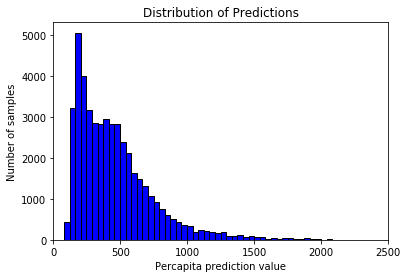

In [76]:
#print distribution of predictions
plt.hist(orig_df['grouppredictions1'], color = 'blue', edgecolor = 'black', bins = 60)
plt.title('Distribution of Predictions')
plt.xlabel('Percapita prediction value')
plt.ylabel('Number of samples')
plt.xlim(0, 2500)
plt.show()

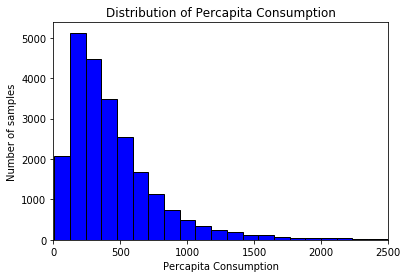

In [78]:
#print distribution of predictions
plt.hist(orig_df[orig_df['training'] == 1]['percapitaconsumption'], color = 'blue', edgecolor = 'black', bins = 60)
plt.title('Distribution of Percapita Consumption')
plt.xlabel('Percapita Consumption')
plt.ylabel('Number of samples')
plt.xlim(0, 2500)
plt.show()

In [60]:
orig_df.keys()

Index(['lnpercapitaconsumption', 'd_fuel_other', 'd_fuel_wood', 'd_fuel_coal',
       'd_fuel_kerosene', 'd_fuel_gas', 'd_fuel_electric', 'd_fuel_none',
       'd_water_other', 'd_water_river', 'd_water_well', 'd_water_truck',
       'd_water_pylon', 'd_water_outside', 'd_water_inside', 'd_drain_none',
       'd_drain_river', 'd_drain_cesspool', 'd_drain_septic',
       'd_drain_outside', 'd_drain_inside', 'd_wall_other', 'd_wall_woodmat',
       'd_wall_stonemud', 'd_wall_quincha', 'd_wall_tapia', 'd_wall_adobe',
       'd_wall_stonecement', 'd_wall_brickcement', 'd_roof_other',
       'd_roof_straw', 'd_roof_mat', 'd_roof_platecane', 'd_roof_tile',
       'd_roof_wood', 'd_roof_concrete', 'd_floor_other', 'd_floor_earth',
       'd_floor_cement', 'd_floor_wood', 'd_floor_tile', 'd_floor_sheets',
       'd_floor_parquet', 'd_electricity', 'd_telephone', 'd_h_educ_none',
       'd_h_educ_pre', 'd_h_educ_prim', 'd_h_educ_sec',
       'd_h_educ_higher_nouni', 'd_h_educ_higher_uni', 'd_h_

In [61]:
orig_df.head()

,lnpercapitaconsumption,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,...,percapitaconsumption,poor,h_hhsize,id_for_matlab,hhid,lncaphat_OLS,percapitahat_OLS,grouppredictions1,grouppredictions2,lncaphatpredictions
0,5.352,0,1,0,0,0,0,0,0,1,...,211.000,0,1,1,233710511,5.246,284.424,292.096,331.963,5.212
1,5.769,0,0,0,0,1,0,0,0,0,...,320.139,0,3,2,295508011,6.129,522.884,471.765,474.219,6.232
2,5.968,0,0,0,0,1,0,0,0,0,...,390.832,0,4,3,257600211,6.666,878.496,845.536,791.460,6.659
3,5.655,0,0,0,0,1,0,0,0,0,...,285.602,1,9,4,198104311,6.088,567.471,428.617,389.403,6.003
4,4.771,0,1,0,0,0,0,0,0,1,...,118.071,1,8,5,24805311,5.008,115.493,150.253,137.191,4.953


In [62]:
orig_df[['lncaphatpredictions', 'training', 'h_hhsize', 'hhid', 'id_for_matlab', 'percapitaconsumption']] 

,lncaphatpredictions,training,h_hhsize,hhid,id_for_matlab,percapitaconsumption
0,5.212,0,1,233710511,1,211.000
1,6.232,0,3,295508011,2,320.139
2,6.659,0,4,257600211,3,390.832
3,6.003,0,9,198104311,4,285.602
4,4.953,0,8,24805311,5,118.071
...,...,...,...,...,...,...
46300,6.014,1,7,199903811,46301,466.992
46301,5.516,1,4,52806611,46302,252.354
46302,5.951,1,7,5900111,46303,389.667
46303,5.469,1,4,360704611,46304,114.055


In [63]:
print(df['hhid'].head(10)) #making sure they match 
orig_df['hhid'].head(10)

0    233710511
1    295508011
2    257600211
3    198104311
4     24805311
5     43204011
6     67704311
7      3705611
8    128307411
9    253209511
Name: hhid, dtype: int64


0    233710511
1    295508011
2    257600211
3    198104311
4     24805311
5     43204011
6     67704311
7      3705611
8    128307411
9    253209511
Name: hhid, dtype: int64

In [64]:
orig_df['lncaphat_OLS']

0       5.246
1       6.129
2       6.666
3       6.088
4       5.008
         ... 
46300   6.100
46301   5.485
46302   5.967
46303   5.558
46304   6.644
Name: lncaphat_OLS, Length: 46305, dtype: float64

In [65]:
orig_df['lncaphatpredictions']

0       5.212
1       6.232
2       6.659
3       6.003
4       4.953
         ... 
46300   6.014
46301   5.516
46302   5.951
46303   5.469
46304   6.717
Name: lncaphatpredictions, Length: 46305, dtype: float64

In [66]:
orig_df.keys()

Index(['lnpercapitaconsumption', 'd_fuel_other', 'd_fuel_wood', 'd_fuel_coal',
       'd_fuel_kerosene', 'd_fuel_gas', 'd_fuel_electric', 'd_fuel_none',
       'd_water_other', 'd_water_river', 'd_water_well', 'd_water_truck',
       'd_water_pylon', 'd_water_outside', 'd_water_inside', 'd_drain_none',
       'd_drain_river', 'd_drain_cesspool', 'd_drain_septic',
       'd_drain_outside', 'd_drain_inside', 'd_wall_other', 'd_wall_woodmat',
       'd_wall_stonemud', 'd_wall_quincha', 'd_wall_tapia', 'd_wall_adobe',
       'd_wall_stonecement', 'd_wall_brickcement', 'd_roof_other',
       'd_roof_straw', 'd_roof_mat', 'd_roof_platecane', 'd_roof_tile',
       'd_roof_wood', 'd_roof_concrete', 'd_floor_other', 'd_floor_earth',
       'd_floor_cement', 'd_floor_wood', 'd_floor_tile', 'd_floor_sheets',
       'd_floor_parquet', 'd_electricity', 'd_telephone', 'd_h_educ_none',
       'd_h_educ_pre', 'd_h_educ_prim', 'd_h_educ_sec',
       'd_h_educ_higher_nouni', 'd_h_educ_higher_uni', 'd_h_

# Generate the CSV for the submission

In [67]:
orig_df.to_csv('peru_dataset_predictions_submission.csv')

# Generate Figure 5

In [68]:
# need those for calculation
print(len(orig_df[orig_df['poor'] == 1]))
print(len(orig_df[orig_df['poor'] == 0]))
USD_TO_PERU = 3.333
program_budget_monthly = 274000000/12  * USD_TO_PERU   # took that from hanna, or do we have infos for that? Do we need to transfer to peru
national_num_households = 8676500 # where do we get that? maybe from the test set?
error_list_pred = []
crra_list_pred = []

for i in range(1,101):
    c = np.quantile(orig_df['lncaphatpredictions'], i/100) # calculate different cutoffs for each i
    incl_c = orig_df['lncaphatpredictions'] <= c # dummy equal to 1 if the predicted income is lower for that given c
    ### Inclusion Error 
    num_incl = incl_c * orig_df.loc[(orig_df['lncaphatpredictions'] < c), 'h_hhsize']
    incl_error_normal = orig_df.loc[incl_c, :] # here i changed poor==0, DAMIAN DID: incl_error_normal = (incl_c ==1 & poor==1) but that would mean their income is lower than c and they are poor
    incl_error_normal = incl_error_normal[incl_error_normal['poor'] == 0]
    # error = np.sum(incl_error_normal.loc[incl_error_normal['training'] == 1, 'lncaphatpredictions']) / (len(orig_df[orig_df['training' == 1]]) - np.sum(orig_df.loc['training' == 1, 'poor'])) # means the sum of included but not poor divided by the sum of not poor HH )
    error = len(incl_error_normal) / (len(orig_df[orig_df['poor'] == 0])) # means the sum of included but not poor divided by the sum of not poor HH 
    ###CRRA Utility
    #calculate total number and % of households included for each cutoff
    # households_incl = np.sum(orig_df.loc[incl_c & orig_df['training'] == 1, :])
    households_incl = np.sum(incl_c)
    # pct_households_incl = households_incl / samplesize # percentage
    # national_hh_incl = national_num_households * pct_households_incl # total number of HH multiplied with percentage of included gives the national number of HH included
    # per_hh_benefits = program_budget_monthly / national_hh_incl 
    per_hh_benefits = program_budget_monthly / households_incl #budget diveded by number of national HH included, we dont have national_num_household: 
    #calculate (NATIONAL) per-household benefits for each cutoff 
    # or instead: per_hh_benefits = program_budget_monthly / households_incl
    # sum up the per-capita consumption and per-capita benefits for each household if they are included for this cutoff
    benefits_received = per_hh_benefits * incl_c
    percapita_benefits_received = benefits_received / orig_df.loc[:, 'h_hhsize'] # divide it by HH size to get per capita
    income = orig_df.loc[:,'grouppredictions1'] + percapita_benefits_received # total income we need for CRRA utility
    # calculate individual CRRA utility 
    crra = np.sum(np.power(income, -2)) / (-2)
    # print(crra)
    error_list_pred.append(error)
    crra_list_pred.append(crra)
    #plot error and income

12975
33330


In [69]:
error_list_pred

[0.0012901290129012902,
 0.0027302730273027305,
 0.0047404740474047405,
 0.007140714071407141,
 0.009630963096309631,
 0.01173117311731173,
 0.01485148514851485,
 0.01791179117911791,
 0.02115211521152115,
 0.025022502250225023,
 0.028682868286828683,
 0.033123312331233126,
 0.037683768376837685,
 0.04233423342334233,
 0.046984698469846986,
 0.05187518751875188,
 0.0573957395739574,
 0.06321632163216322,
 0.06870687068706871,
 0.07419741974197419,
 0.08022802280228022,
 0.08670867086708671,
 0.09291929192919292,
 0.09981998199819982,
 0.10723072307230723,
 0.11464146414641464,
 0.12166216621662167,
 0.12907290729072907,
 0.13738373837383738,
 0.14533453345334532,
 0.15361536153615363,
 0.16195619561956195,
 0.1707170717071707,
 0.17992799279927993,
 0.1888988898889889,
 0.1981998199819982,
 0.20753075307530752,
 0.21755175517551756,
 0.22682268226822683,
 0.237023702370237,
 0.24707470747074708,
 0.25757575757575757,
 0.26774677467746777,
 0.2782478247824782,
 0.2890789078907891,
 0.29

In [ ]:
plt.plot(error_list_pred, crra_list_pred)